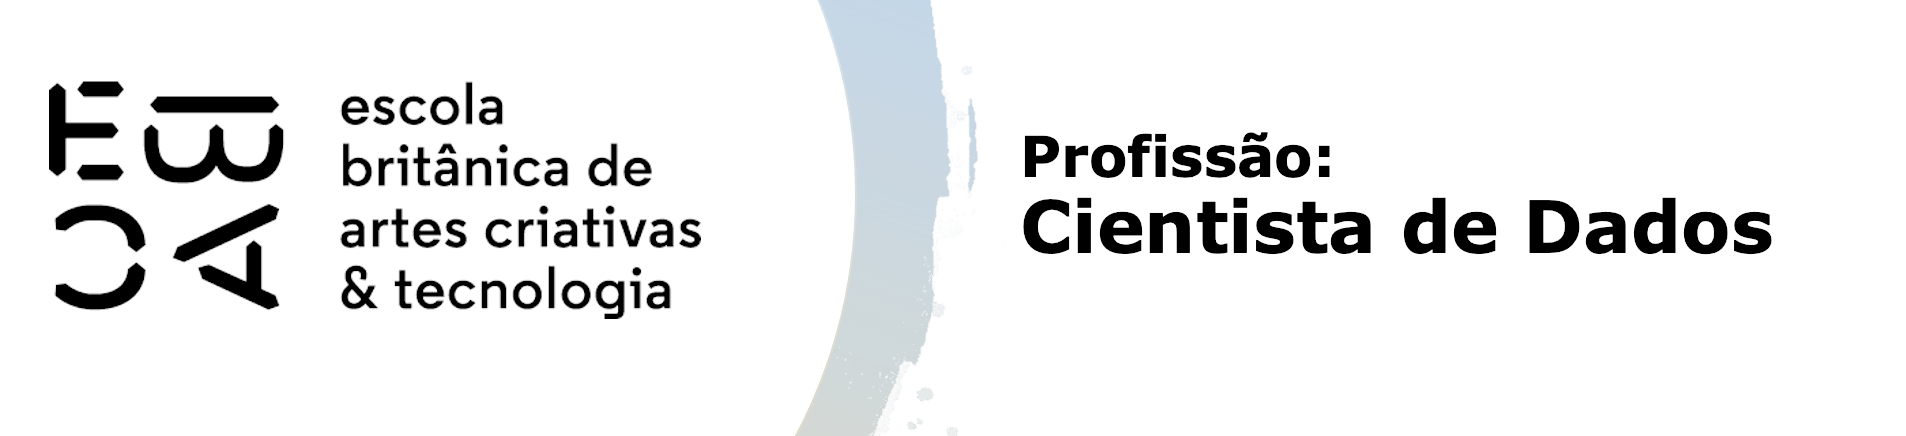

# Métodos hierárquicos de agrupamento - Tarefa

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc
from scipy.cluster import hierarchy

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [14]:
df = sns.load_dataset('penguins')

df_num = df.select_dtypes(include= 'number')

print(df_num.info())

df_num 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB
None


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
3               NaN            NaN                NaN          NaN
4              36.7           19.3              193.0       3450.0
..              ...            ...                ...          ...
339             NaN            NaN                NaN          NaN
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[344 rows x 4 columns]

In [16]:
df_num.dropna(inplace= True)
df_num

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[342 rows x 4 columns]

In [20]:
scaler= StandardScaler()
df_num_pad= scaler.fit_transform(df_num)

pd.DataFrame(df_num_pad)

0         1         2         3
0   -0.884499  0.785449 -1.418347 -0.564142
1   -0.811126  0.126188 -1.062250 -0.501703
2   -0.664380  0.430462 -0.421277 -1.188532
3   -1.324737  1.089724 -0.563715 -0.938776
4   -0.847812  1.748985 -0.777373 -0.689020
..        ...       ...       ...       ...
337  0.601305 -1.750171  0.931890  0.903175
338  0.527932 -1.445897  1.003109  0.809516
339  1.188289 -0.735923  1.501644  1.933419
340  0.234440 -1.192335  0.789451  1.246590
341  1.096572 -0.533073  0.860670  1.496346

[342 rows x 4 columns]

In [22]:
clustering= AgglomerativeClustering(n_clusters= 3,
                                    linkage= 'complete',
                                    distance_threshold= None)

clustering.fit(df_num_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [24]:
df_num['grupo'] = clustering.labels_
df_num

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  grupo
0              39.1           18.7              181.0       3750.0      1
1              39.5           17.4              186.0       3800.0      1
2              40.3           18.0              195.0       3250.0      1
4              36.7           19.3              193.0       3450.0      1
5              39.3           20.6              190.0       3650.0      1
..              ...            ...                ...          ...    ...
338            47.2           13.7              214.0       4925.0      0
340            46.8           14.3              215.0       4850.0      0
341            50.4           15.7              222.0       5750.0      0
342            45.2           14.8              212.0       5200.0      0
343            49.9           16.1              213.0       5400.0      0

[342 rows x 5 columns]

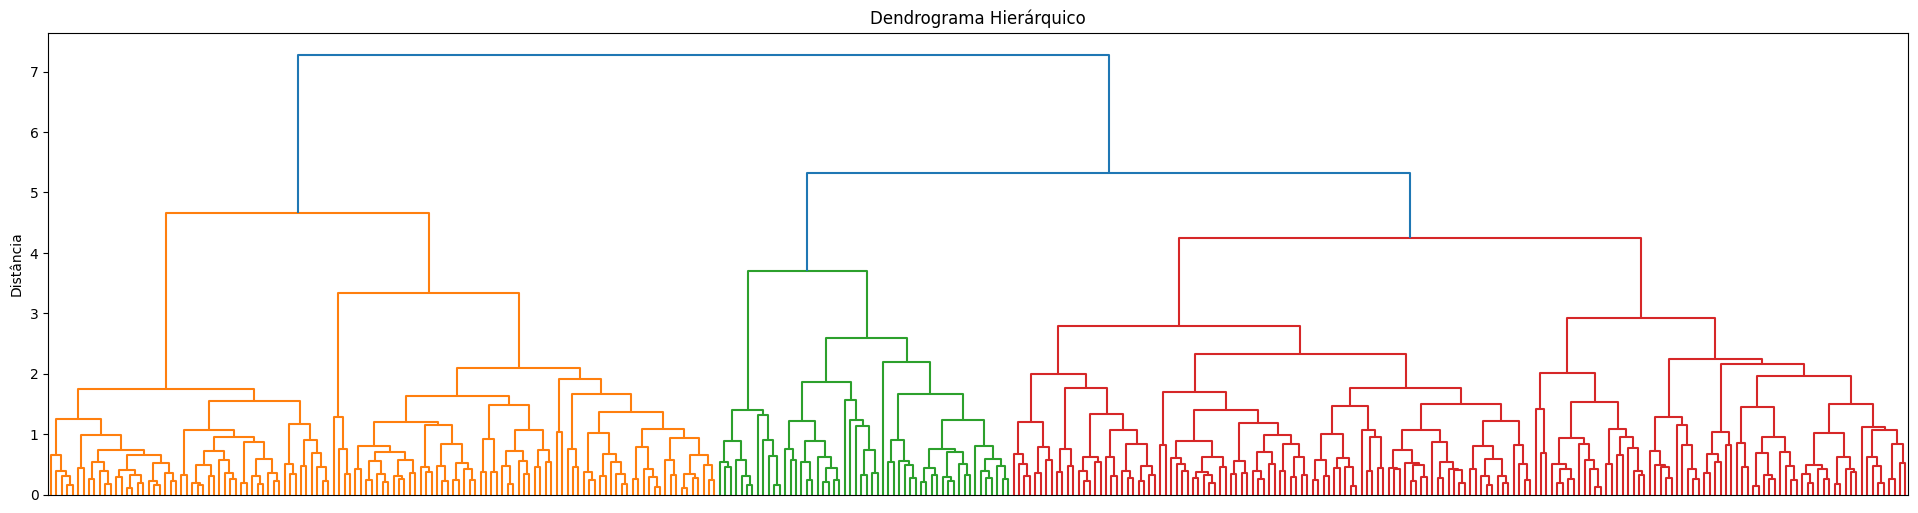

In [36]:
plt.figure(figsize=(24, 6))

Z = hierarchy.linkage(df_num_pad, method='complete')

dn = hierarchy.dendrogram(Z)

plt.title('Dendrograma Hierárquico')
plt.xticks([])
plt.ylabel('Distância')

plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

Grupo 0: 123 pinguis
Grupo 1: 165 pinguis
Grupo 2: 54 pinguis


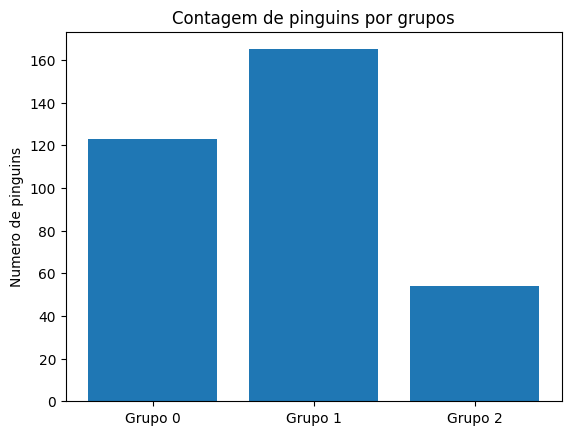

In [46]:
contagem_grupos= df_num['grupo'].value_counts().sort_index()

for indice, valor in enumerate(contagem_grupos):
    print('Grupo {}: {} pinguis'.format(indice, valor))

rotulos_grupos= [f'Grupo {grupo}' for grupo in contagem_grupos.index]
plt.bar(rotulos_grupos, contagem_grupos)

plt.ylabel('Numero de pinguins')
plt.title('Contagem de pinguins por grupos')

plt.show()

grupo        0    1   2
species                
Adelie       0  151   0
Chinstrap    0   14  54
Gentoo     123    0   0

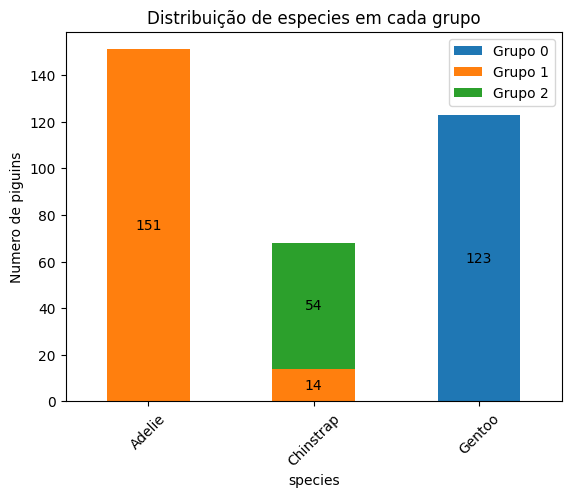

In [52]:
tabela_cruzada= pd.crosstab(df['species'], df_num['grupo'])
ax= tabela_cruzada.plot(kind= 'bar', stacked= True)

plt.xticks(rotation= 45)
plt.ylabel('Numero de piguins')
plt.title('Distribuição de especies em cada grupo')
plt.legend(labels= [f'Grupo {grupo}' for grupo in tabela_cruzada.columns])

for p in ax.patches:
    width, height= p.get_width(), p.get_height()
    x, y= p.get_xy()
    if height !=0:
        ax.annotate(int(height), (x + width/2, + y + height/2), ha= 'center', va='center')

display(tabela_cruzada)
plt.show()

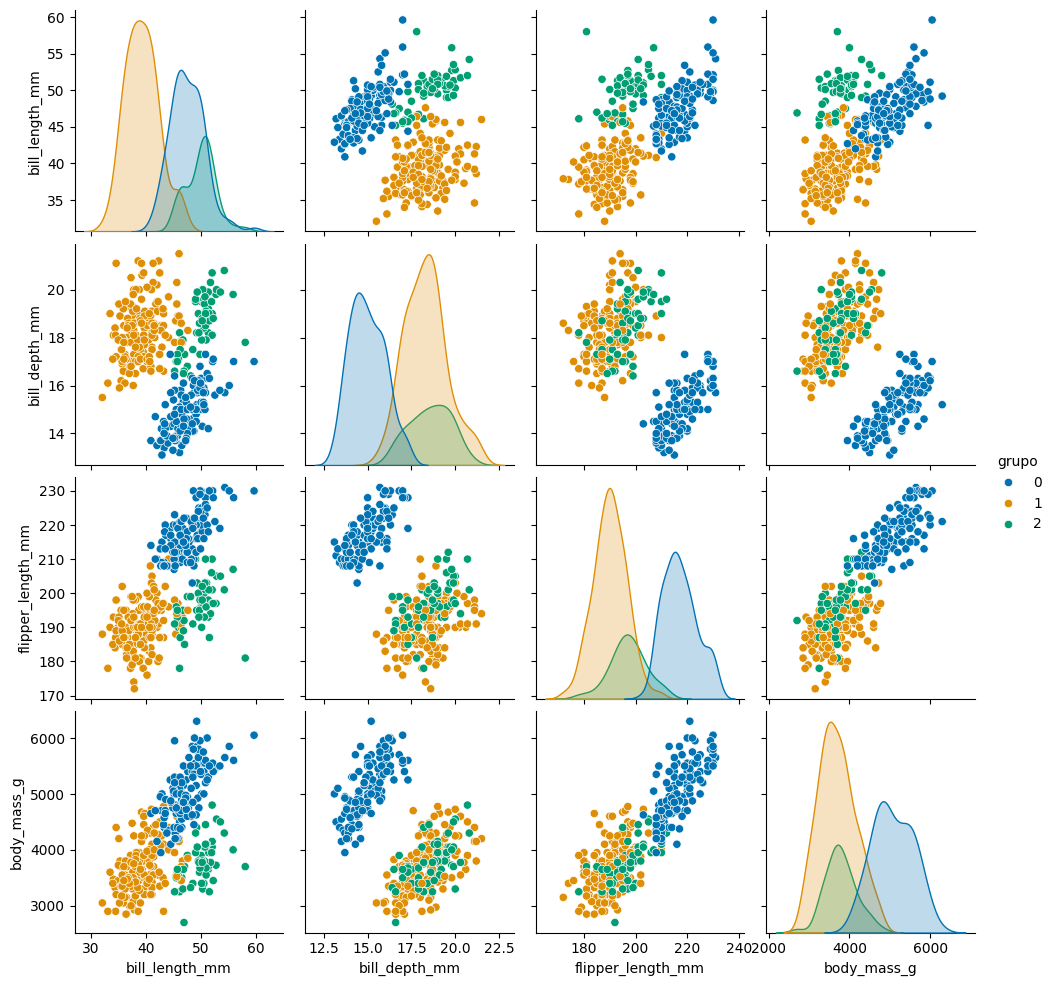

In [55]:
sns.pairplot(data= df_num, hue= 'grupo', palette= 'colorblind');

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

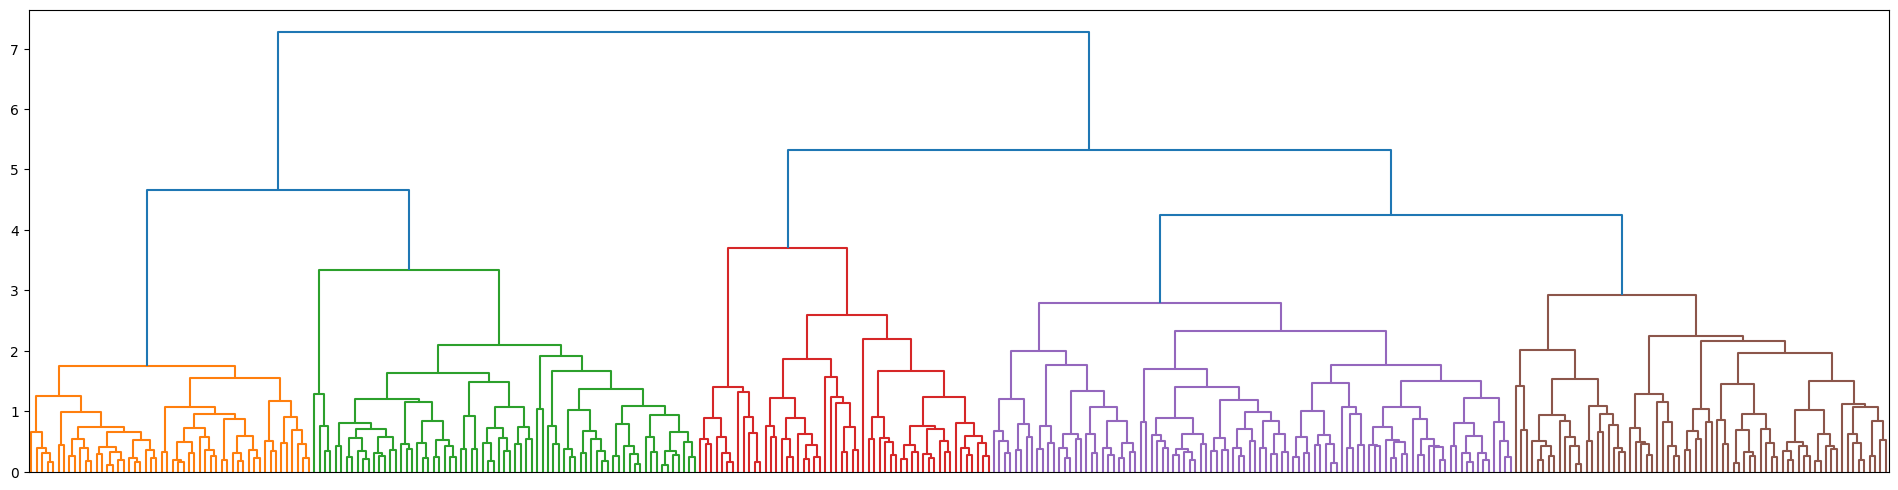

In [57]:
plt.figure(figsize= (24, 6))

Z = hierarchy.linkage(df_num_pad, method= 'complete')
dn = hierarchy.dendrogram(Z, color_threshold= 3.8)

plt.xticks([])
plt.show()

In [63]:
clustering= AgglomerativeClustering(n_clusters= 5, linkage= 'complete', distance_threshold= None)
clustering.fit(df_num_pad)

df_num['subgrupo'] = clustering.labels_
df_num

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  grupo  \
0              39.1           18.7              181.0       3750.0      1   
1              39.5           17.4              186.0       3800.0      1   
2              40.3           18.0              195.0       3250.0      1   
4              36.7           19.3              193.0       3450.0      1   
5              39.3           20.6              190.0       3650.0      1   
..              ...            ...                ...          ...    ...   
338            47.2           13.7              214.0       4925.0      0   
340            46.8           14.3              215.0       4850.0      0   
341            50.4           15.7              222.0       5750.0      0   
342            45.2           14.8              212.0       5200.0      0   
343            49.9           16.1              213.0       5400.0      0   

     subgrupo  
0           4  
1           4  
2           4  
4           4  
5           2  
..        ...  
338         3  
340         3  
341         1  
342         3  
343         1  

[342 rows x 6 columns]

Quantos pinguins de cada especie ha em cada grupo?

Subgrupo 0: 54 pinguins
Subgrupo 1: 71 pinguins
Subgrupo 2: 69 pinguins
Subgrupo 3: 52 pinguins
Subgrupo 4: 96 pinguins


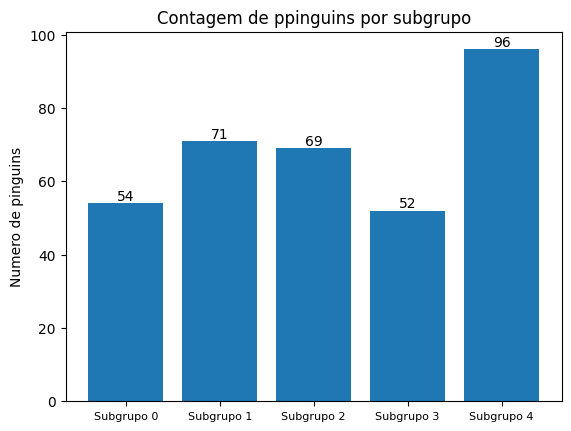

In [67]:
print('Quantos pinguins de cada especie ha em cada grupo?\n')

contagem_subgrupos = df_num['subgrupo'].value_counts().sort_index()

for indice, valor in enumerate(contagem_subgrupos):
    print('Subgrupo {}: {} pinguins'.format(indice, valor))

rotulos_subgrupos= [f'Subgrupo {grupo}' for grupo in contagem_subgrupos.index]

plt.bar(rotulos_subgrupos, contagem_subgrupos)
plt.title('Contagem de ppinguins por subgrupo')
plt.ylabel('Numero de pinguins')
plt.xticks(fontsize= 8)

for i, v in enumerate(contagem_subgrupos):
    plt.text(i, v, str(v), ha= 'center', va= 'bottom')

plt.show()

Quantidade de pinguins de cada espécie por sexo


sex       Female  Male
subgrupo              
0             20    34
1              9    61
2             13    55
3             49     0
4             74    18


Tabela cruzada percentual:


species   Adelie         Chinstrap          Gentoo        
sex       Female    Male    Female    Male  Female    Male
subgrupo                                                  
0          0.00%   0.00%     6.01%  10.21%   0.00%   0.00%
1          0.00%   0.00%     0.00%   0.00%   2.70%  18.32%
2          1.20%  16.52%     2.70%   0.00%   0.00%   0.00%
3          0.00%   0.00%     0.00%   0.00%  14.71%   0.00%
4         20.72%   5.41%     1.50%   0.00%   0.00%   0.00%

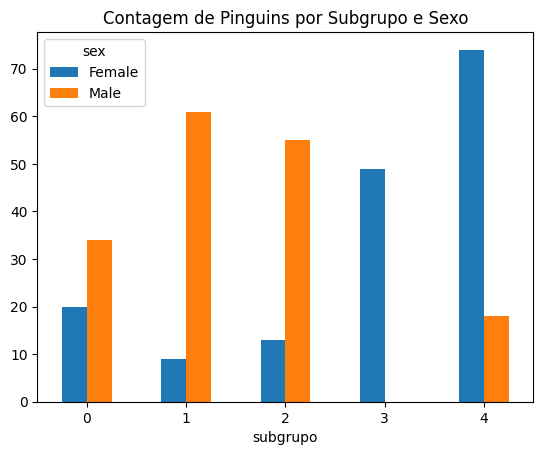

In [77]:
df_ = df_num.merge(right=df[['sex', 'species']], how='left', left_index=True, right_index=True)
contagem_subgrupo_sex = (df_[['subgrupo', 'sex']].value_counts().unstack().fillna(0).astype(int))

print('Quantidade de pinguins de cada espécie por sexo')
display(contagem_subgrupo_sex)

print('\nTabela cruzada percentual:')
tabela_cruzada_percentual = pd.crosstab(index=[df_['subgrupo'], df_['sex']], 
                                       columns=df_['species'], 
                                       normalize=True) * 100
tabela_cruzada_percentual = tabela_cruzada_percentual.unstack().fillna(0)

display(tabela_cruzada_percentual.map(lambda x: f'{x:.2f}%'))

contagem_subgrupo_sex.plot(kind='bar')
plt.title('Contagem de Pinguins por Subgrupo e Sexo')
plt.xticks(rotation=0)
plt.show()

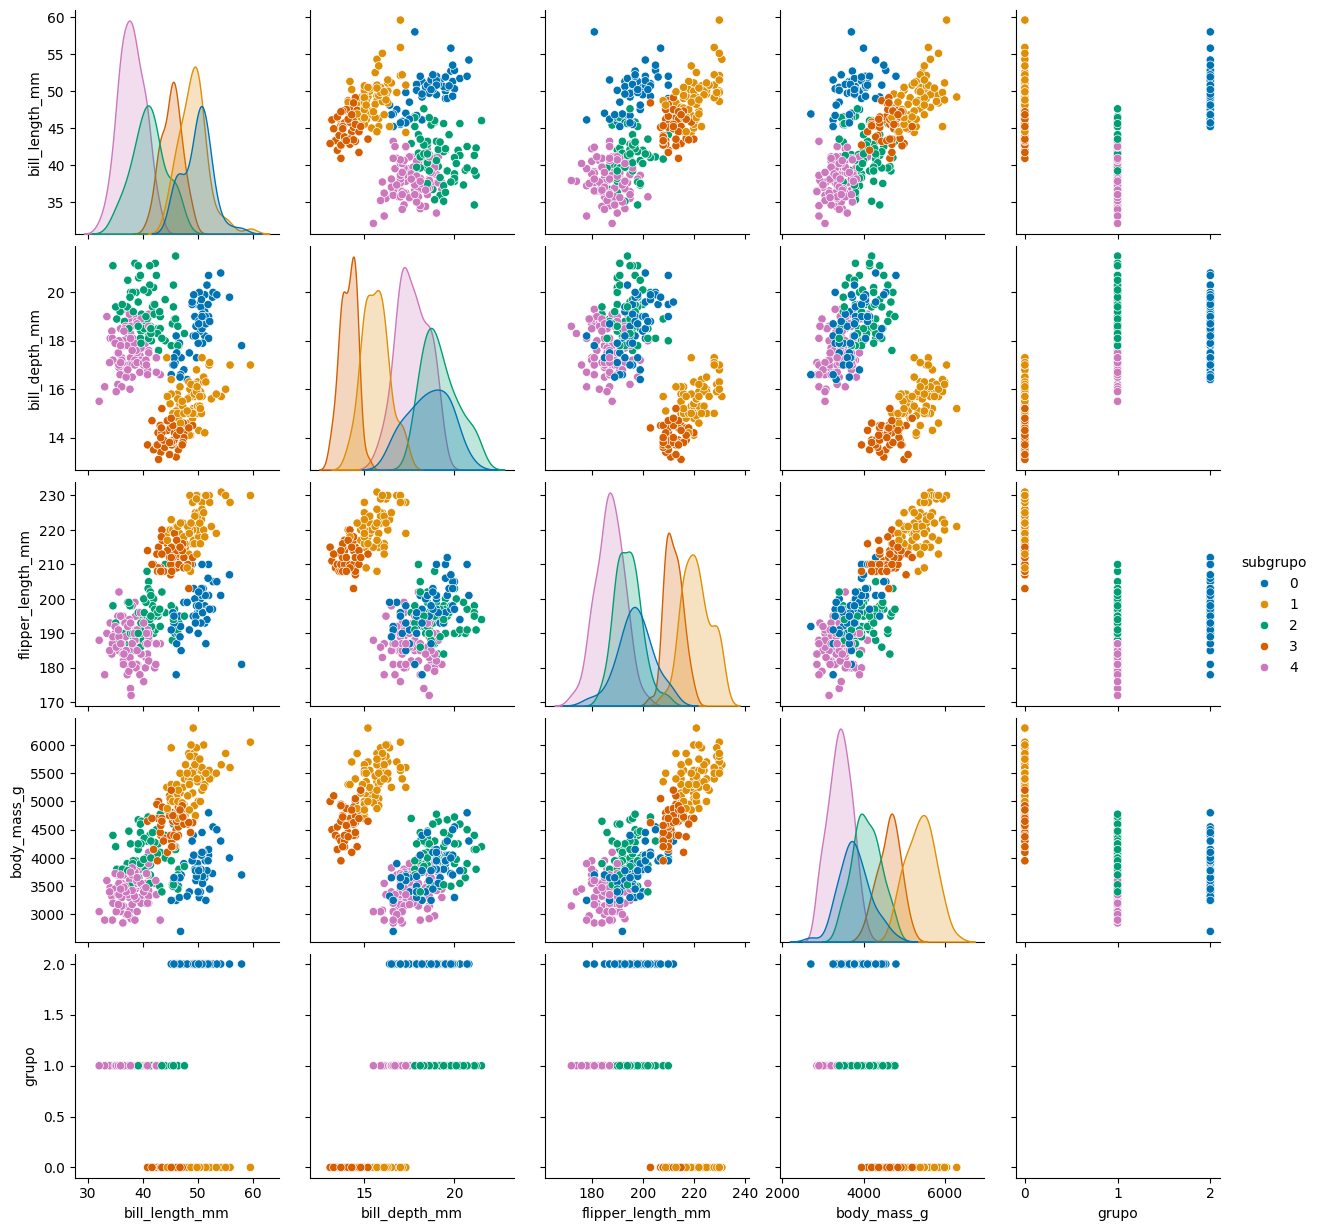

In [79]:
sns.pairplot(data=df_, hue='subgrupo', palette= 'colorblind');